In [1]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import math

## Задача 1. Минимизация гладкой функции

1. Рассмотрим функцию f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2) на промежутке [1, 30]

2. Напишите на Питоне функцию, вычисляющую значение f(x) по известному x

3. Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize. Попробуйте менять начальное приближение и изучить, меняется ли результат.

4. Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. 

5. Теперь измените начальное приближение на x=30.

6. Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции, можно увидеть, в какие именно минимумы мы попали.

In [2]:
# 1, 2
f = lambda x: np.sin(x/5.) * np.exp(x/10.) + 5 * np.exp(-x/2.)
x_min, x_max = [1, 30]

In [3]:
# 3
optimization_result1 = optimize.minimize(fun=f, x0=-5)
print("x:", optimization_result1.x, "\nf(x):", optimization_result1.fun)

x: [4.13624211] 
f(x): 1.745268290511689


In [4]:
# 3
optimization_result2 = optimize.minimize(fun=f, x0=5)
print("x:", optimization_result2.x, "\nf(x):", optimization_result2.fun)

x: [4.13628832] 
f(x): 1.745268290331984


In [5]:
# 4
optimization_result3 = optimize.minimize(fun=f, x0=2, method="BFGS")
print("BFGS", "\nx:", optimization_result3.x, "\nf(x):", optimization_result3.fun)

BFGS 
x: [4.13627628] 
f(x): 1.7452682903447336


In [6]:
# 5
optimization_result4 = optimize.minimize(fun=f, x0=30, method="BFGS")
print("BFGS", "\nx:", optimization_result4.x, "\nf(x):", optimization_result4.fun)

BFGS 
x: [25.88019321] 
f(x): -11.898894665981313


In [7]:
# 6 
x = np.arange(x_min, x_max, 0.1)
y = f(x)
x_points = [optimization_result2.x, optimization_result3.x, optimization_result4.x]
y_points = [optimization_result2.fun, optimization_result3.fun, optimization_result4.fun]
label_points = ["default, x0=5", "BFGS, x0=2", "BFGS, x0=30"]

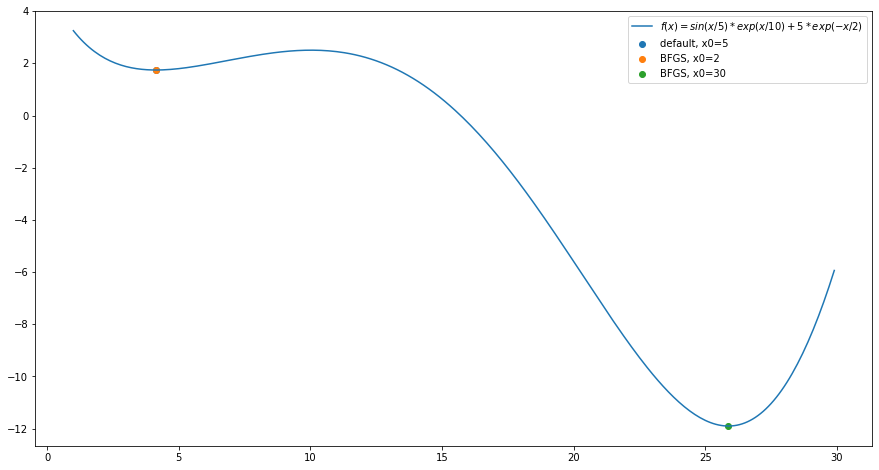

In [8]:
plt.figure(figsize=(15, 8))
plt.plot(x, y, label="$f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)$")
for (x_, y_, label) in zip(x_points, y_points, label_points):
    plt.scatter(x=[x_], y=[y_], label=label)
plt.legend()
plt.show()

### Выводы
Как видно все алгоритмы оптимизации нашли минимум, но не все нашли глобальный. 

Глоабльный миниму нашел алгоритм BFGS, который стартовал с x=30

## Задача 2. Глобальная оптимизация

1. Применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.

2. Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30].

3. Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. 

In [9]:
# 1
f = lambda x: np.sin(x[0]/5.) * np.exp(x[0]/10.) + 5 * np.exp(-x[0]/2.)
x_min, x_max = [1, 30]

In [10]:
# 2
bounds = [(x_min, x_max)]
optimization_result_de1 = optimize.differential_evolution(func=f, bounds=bounds)
print("Differential evolution", "\nx:", optimization_result_de1.x[0], "\nf(x):", optimization_result_de1.fun)

Differential evolution 
x: 25.88020539298747 
f(x): -11.898894665935863


In [11]:
# 3
print(optimization_result4)
print()
print(optimization_result_de1)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -11.898894665981313
        x: [ 2.588e+01]
      nit: 6
      jac: [ 0.000e+00]
 hess_inv: [[ 1.679e+00]]
     nfev: 14
     njev: 7

 message: Optimization terminated successfully.
 success: True
     fun: -11.898894665935863
       x: [ 2.588e+01]
     nit: 3
    nfev: 66
     jac: [ 7.105e-06]


### Выводы
Видно, что по количеству итераций (nit) алгоритмы сравнимы и почти не отличаются от различных запусков

Однако количество вычислений значения функции (nfev) для BFGS значительно меньше чем для дифференциальной эволюции

## Задача 3. Минимизация негладкой функции

1. Рассмотреть функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.

2. Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

3. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30.

4. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. 

5. Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).


In [12]:
# 1
h = lambda x: int(f(x))
x_min, x_max = [1, 30]

In [13]:
# 2
x = [value for value in range(x_min, x_max+1)]
y = [h((value, )) for value in x] 

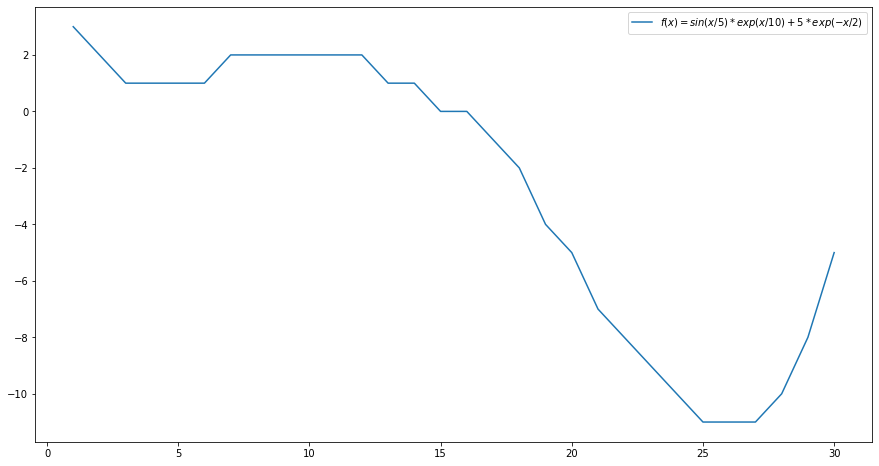

In [14]:
plt.figure(figsize=(15, 8))
plt.plot(x, y, label="$f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)$")
plt.legend()
plt.show()

In [15]:
# 3
optimization_result_bfgs = optimize.minimize(fun=h, x0=30, method="BFGS")
print("BFGS", "\nx:", optimization_result_bfgs.x, "\nf(x):", optimization_result_bfgs.fun)

BFGS 
x: [30.] 
f(x): -5


In [16]:
# 3
optimization_result_bfgs = optimize.minimize(fun=h, x0=29, method="BFGS")
print("BFGS", "\nx:", optimization_result_bfgs.x, "\nf(x):", optimization_result_bfgs.fun)

BFGS 
x: [29.] 
f(x): -8


In [17]:
# 4
bounds = [(x_min, x_max)]
optimization_result_de1 = optimize.differential_evolution(func=h, bounds=bounds)
print("Differential evolution", "\nx:", optimization_result_de1.x[0], "\nf(x):", optimization_result_de1.fun)

Differential evolution 
x: 25.19163377935 
f(x): -11.0


### Выводы
Видно, что BFGS не подходит для негладких функций, так как он основан на градиентных методах, а градиент не меняется в близи одного значения x

Дифференциальная эволюция справляется с негладкой функции